In [1]:
import pandas as pd
import numpy
import spacy
%matplotlib inline

In [2]:
reviewsdf = pd.read_csv('deceptive-opinion.csv')

In [3]:
reviewsdf.head(5)

,deceptive,hotel,polarity,source,text
0,truthful,conrad,positive,TripAdvisor,We stayed for a one night getaway with family ...
1,truthful,hyatt,positive,TripAdvisor,Triple A rate with upgrade to view room was le...
2,truthful,hyatt,positive,TripAdvisor,This comes a little late as I'm finally catchi...
3,truthful,omni,positive,TripAdvisor,The Omni Chicago really delivers on all fronts...
4,truthful,hyatt,positive,TripAdvisor,I asked for a high floor away from the elevato...


In [4]:
reviewsdf.tail(5)

,deceptive,hotel,polarity,source,text
1595,deceptive,intercontinental,negative,MTurk,Problems started when I booked the InterContin...
1596,deceptive,amalfi,negative,MTurk,The Amalfi Hotel has a beautiful website and i...
1597,deceptive,intercontinental,negative,MTurk,The Intercontinental Chicago Magnificent Mile ...
1598,deceptive,palmer,negative,MTurk,"The Palmer House Hilton, while it looks good i..."
1599,deceptive,amalfi,negative,MTurk,"As a former Chicagoan, I'm appalled at the Ama..."


In [5]:
#visualizations go here

In [6]:
reviewsdf.pivot_table(
    columns=['deceptive','polarity'],
    values=['deceptive','polarity'],
    index = ['hotel'],
    aggfunc = len).fillna(0)

source                                 text           \
deceptive        deceptive          truthful          deceptive            
polarity          negative positive negative positive  negative positive   
hotel                                                                      
affinia                 20       20       20       20        20       20   
allegro                 20       20       20       20        20       20   
amalfi                  20       20       20       20        20       20   
ambassador              20       20       20       20        20       20   
conrad                  20       20       20       20        20       20   
fairmont                20       20       20       20        20       20   
hardrock                20       20       20       20        20       20   
hilton                  20       20       20       20        20       20   
homewood                20       20       20       20        20       20   
hyatt                   20       20       20       20        20       20   
intercontinental        20       20       20       20        20       20   
james                   20       20       20       20        20       20   
knickerbocker           20       20       20       20        20       20   
monaco                  20       20       20       20        20       20   
omni                    20       20       20       20        20       20   
palmer                  20       20       20       20        20       20   
sheraton                20       20       20       20        20       20   
sofitel                 20       20       20       20        20       20   
swissotel               20       20       20       20        20       20   
talbott                 20       20       20       20        20       20   

                                    
deceptive        truthful           
polarity         negative positive  
hotel                               
affinia                20       20  
allegro                20       20  
amalfi                 20       20  
ambassador             20       20  
conrad                 20       20  
fairmont               20       20  
hardrock               20       20  
hilton                 20       20  
homewood               20       20  
hyatt                  20       20  
intercontinental       20       20  
james                  20       20  
knickerbocker          20       20  
monaco                 20       20  
omni                   20       20  
palmer                 20       20  
sheraton               20       20  
sofitel                20       20  
swissotel              20       20  
talbott                20       20

In [7]:
nlpcopy=reviewsdf.copy()
nlpcopy.head()

,deceptive,hotel,polarity,source,text
0,truthful,conrad,positive,TripAdvisor,We stayed for a one night getaway with family ...
1,truthful,hyatt,positive,TripAdvisor,Triple A rate with upgrade to view room was le...
2,truthful,hyatt,positive,TripAdvisor,This comes a little late as I'm finally catchi...
3,truthful,omni,positive,TripAdvisor,The Omni Chicago really delivers on all fronts...
4,truthful,hyatt,positive,TripAdvisor,I asked for a high floor away from the elevato...


In [8]:
import nltk

In [9]:
from nltk.corpus import stopwords
import re

In [10]:
stopwds=set(stopwords.words('english'))

In [11]:
import en_core_web_md

In [12]:
nlp=en_core_web_md.load()

In [13]:
#parsed = nlp.pipe(iter(data_nlp['text']), batch_size=1, n_threads=4)

from sklearn.feature_extraction.text import TfidfVectorizer
 
# This vectorizer breaks text into single words and bi-grams
# and then calculates the TF-IDF representation
vectorizer = TfidfVectorizer(ngram_range=(1,2))

 
# the 'fit' builds up the vocabulary from all the reviews
# while the 'transform' step turns each indivdual text into
# a matrix of numbers.
vectors = vectorizer.fit_transform(nlpcopy['text'])

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(vectors, nlpcopy['deceptive'], test_size=0.1, random_state=42)


In [15]:
from sklearn.svm import LinearSVC
 
# initialise the SVM classifier
clf = LinearSVC()
 # train the classifier
clf.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [16]:
preds = clf.predict(X_test)
print(list(preds[:10]))
print(y_test[:10])

['deceptive', 'deceptive', 'deceptive', 'truthful', 'truthful', 'deceptive', 'deceptive', 'truthful', 'deceptive', 'deceptive']
526     deceptive
354      truthful
168      truthful
135      truthful
937      truthful
1544    deceptive
1253    deceptive
237      truthful
478     deceptive
650     deceptive
Name: deceptive, dtype: object


In [17]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, preds))

0.89375


In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test, preds))

             precision    recall  f1-score   support

  deceptive       0.86      0.94      0.89        77
   truthful       0.93      0.86      0.89        83

avg / total       0.90      0.89      0.89       160



In [19]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, preds))

[[72  5]
 [12 71]]


http://www.developintelligence.com/blog/2017/03/predicting-yelp-star-ratings-review-text-python/
texts = ["I really hated my stay at The NotARealName Hotel", "Had a really really great stay at NotARealName - would recommend to everyone"]
 
#### note that we only call .transform() here and not .fit_transform()
#### as we want to keep the vocabulary from the previous experiments
vecs = vectorizer.transform(texts)
 
#### predict a positive or negative label for each input
print(classifier.predict(vecs))
 
>>>['n' 'p']

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

In [21]:
# initialise the SVM classifier
clf = LogisticRegression()
#LinearDiscriminantAnalysis()
#GaussianNB()))
#SVC()
 # train the classifier
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [22]:
#

In [23]:
preds = clf.predict(X_test)
print(list(preds[:10]))
print(y_test[:10])

['deceptive', 'truthful', 'deceptive', 'truthful', 'truthful', 'deceptive', 'deceptive', 'truthful', 'deceptive', 'deceptive']
526     deceptive
354      truthful
168      truthful
135      truthful
937      truthful
1544    deceptive
1253    deceptive
237      truthful
478     deceptive
650     deceptive
Name: deceptive, dtype: object


In [24]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, preds))

0.875


In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test, preds))

             precision    recall  f1-score   support

  deceptive       0.83      0.94      0.88        77
   truthful       0.93      0.82      0.87        83

avg / total       0.88      0.88      0.87       160



In [26]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, preds))

[[72  5]
 [15 68]]


###initialise the SVM classifier
clf = GaussianNB()
#clf = LinearDiscriminantAnalysis()
#LinearDiscriminantAnalysis()
#GaussianNB()
#SVC()
 #train the classifier
clf.fit(X_train, y_train)
#doesn't work on a sparse matrix

In [27]:
#Begin topic modeling
#need dense matrix to run Naive Bayes and LDA models

In [28]:
#parsed = nlp.pipe(iter(nlpcopy['text']),batch_size=1,n_threads=4)

In [29]:
parsed = nlp.pipe(iter(nlpcopy['text']),batch_size=1,n_threads=4)

tokens,lemma,parts,stopword=[],[],[],[]

for parsed_review in parsed:
    tokens.append([n.text for n in parsed_review])
    lemma.append([n.lemma_ for n in parsed_review])
    parts.append([n.pos_ for n in parsed_review])
    stopword.append([n.is_stop for n in parsed_review])
nlpcopy['tokens'] = tokens 
nlpcopy['tokens_stopwords'] = nlpcopy['tokens'].apply(lambda x: [item for item in x if item not in stopwds])
nlpcopy['lemma'] = lemma
nlpcopy['pos'] = parts
nlpcopy['stopword'] = stopword
nlpcopy.head(5).append(nlpcopy.tail(5))

,deceptive,hotel,polarity,source,text,tokens,tokens_stopwords,lemma,pos,stopword
0,truthful,conrad,positive,TripAdvisor,We stayed for a one night getaway with family ...,"[We, stayed, for, a, one, night, getaway, with...","[We, stayed, one, night, getaway, family, thur...","[-PRON-, stay, for, a, one, night, getaway, wi...","[PRON, VERB, ADP, DET, NUM, NOUN, NOUN, ADP, N...","[False, False, False, False, False, False, Fal..."
1,truthful,hyatt,positive,TripAdvisor,Triple A rate with upgrade to view room was le...,"[Triple, A, rate, with, upgrade, to, view, roo...","[Triple, A, rate, upgrade, view, room, less, $...","[triple, a, rate, with, upgrade, to, view, roo...","[ADJ, DET, NOUN, ADP, NOUN, PART, NOUN, NOUN, ...","[False, False, False, False, False, False, Fal..."
2,truthful,hyatt,positive,TripAdvisor,This comes a little late as I'm finally catchi...,"[This, comes, a, little, late, as, I, 'm, fina...","[This, comes, little, late, I, 'm, finally, ca...","[this, come, a, little, late, as, -PRON-, be, ...","[DET, VERB, DET, ADJ, ADJ, ADP, PRON, VERB, AD...","[False, False, False, False, False, False, Fal..."
3,truthful,omni,positive,TripAdvisor,The Omni Chicago really delivers on all fronts...,"[The, Omni, Chicago, really, delivers, on, all...","[The, Omni, Chicago, really, delivers, fronts,...","[the, omni, chicago, really, deliver, on, all,...","[DET, PROPN, PROPN, ADV, VERB, ADP, DET, NOUN,...","[False, False, False, False, False, False, Fal..."
4,truthful,hyatt,positive,TripAdvisor,I asked for a high floor away from the elevato...,"[I, asked, for, a, high, floor, away, from, th...","[I, asked, high, floor, away, elevator, I, got...","[-PRON-, ask, for, a, high, floor, away, from,...","[PRON, VERB, ADP, DET, ADJ, NOUN, ADV, ADP, DE...","[False, False, False, False, False, False, Fal..."
1595,deceptive,intercontinental,negative,MTurk,Problems started when I booked the InterContin...,"[Problems, started, when, I, booked, the, Inte...","[Problems, started, I, booked, InterContinenta...","[problem, start, when, -PRON-, book, the, inte...","[NOUN, VERB, ADV, PRON, VERB, DET, PROPN, PROP...","[False, False, False, False, False, False, Fal..."
1596,deceptive,amalfi,negative,MTurk,The Amalfi Hotel has a beautiful website and i...,"[The, Amalfi, Hotel, has, a, beautiful, websit...","[The, Amalfi, Hotel, beautiful, website, inter...","[the, amalfi, hotel, have, a, beautiful, websi...","[DET, PROPN, PROPN, VERB, DET, ADJ, NOUN, CCON...","[False, False, False, False, False, False, Fal..."
1597,deceptive,intercontinental,negative,MTurk,The Intercontinental Chicago Magnificent Mile ...,"[The, Intercontinental, Chicago, Magnificent, ...","[The, Intercontinental, Chicago, Magnificent, ...","[the, intercontinental, chicago, magnificent, ...","[DET, PROPN, PROPN, PROPN, PROPN, DET, NOUN, A...","[False, False, False, False, False, False, Fal..."
1598,deceptive,palmer,negative,MTurk,"The Palmer House Hilton, while it looks good i...","[The, Palmer, House, Hilton, ,, while, it, loo...","[The, Palmer, House, Hilton, ,, looks, good, p...","[the, palmer, house, hilton, ,, while, -PRON-,...","[DET, PROPN, PROPN, PROPN, PUNCT, ADP, PRON, V...","[False, False, False, False, False, False, Fal..."
1599,deceptive,amalfi,negative,MTurk,"As a former Chicagoan, I'm appalled at the Ama...","[As, a, former, Chicagoan, ,, I, 'm, appalled,...","[As, former, Chicagoan, ,, I, 'm, appalled, Am...","[as, a, former, chicagoan, ,, -PRON-, be, appa...","[ADP, DET, ADJ, PROPN, PUNCT, PRON, VERB, VERB...","[False, False, False, False, False, False, Fal..."


In [30]:
import gensim
#
from collections import defaultdict

C:\Users\Karen\Anaconda3\lib\site-packages\gensim\utils.py:865: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [31]:
def build_model(train_data, topic_n):
    frequency = defaultdict(int)
    for text in train_data:
        for token in text:
            frequency[token] += 1
    # get freq > 1
    word_freq_1plus = [[x for x in words if frequency[x] > 1] for words in train_data]
    # Create dictionary
    dictionary = gensim.corpora.Dictionary(word_freq_1plus)
    # Create Corpus
    corpus = [dictionary.doc2bow(text) for text in train_data]
    # corpus to tfidf
    tfidf = gensim.models.TfidfModel(corpus) 
    corp_tf = tfidf[corpus] 
    # 300 topics works better than 100 topics
    topic_n = topic_n
    lsi = gensim.models.LsiModel(corp_tf, id2word=dictionary, num_topics = topic_n)
    corp_topics = lsi[corp_tf] 
    return corp_topics, dictionary, tfidf, lsi  

train_data = nlpcopy.tokens_stopwords
topic_n = 300

built = build_model(
    train_data = train_data,
    topic_n = 300)

In [32]:
#make copy of df for model building
nlpcopysvd = pd.DataFrame([dict(row) for row in built[0]])
topic_only = nlpcopysvd

In [33]:
# X1 Topic Dataset
X1 = topic_only
#X2 = pandas.concat(
   # [topic_only,
    # nlpcopy[['pron_ct', 'noun_ct', 'punct_ct', 'verb_ct']]],
    #axis = 1)
#X3 = pandas.concat(
   # [X2,
     #pandas.get_dummies(nlpcopy[['hotel','polarity']])],
   # axis = 1)
Y = nlpcopy.deceptive == 'deceptive'

In [34]:
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
#from sklearn.tree import DecisionTreeClassifierlda
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
#from sklearn.lda import LDA 
from sklearn.model_selection import GridSearchCV
#from sklearn.model_selection import KFold
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
%matplotlib inline

C:\Users\Karen\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation

In [36]:
seed = 5
# prepare models
models = []
models.append(('LR', LogisticRegression()))
#models.append(('LDA', LinearDiscriminantAnalysis()))
#models.append(('KNN', KNeighborsClassifier()))
#models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RF', RandomForestClassifier(n_jobs = -1, n_estimators = 500)))

In [37]:
models.append(('LDA', LinearDiscriminantAnalysis()))

In [38]:
# 

def run_models(train_data, title):
    results = []
    names = []

    for name, model in models:
        kfold = model_selection.KFold(n_splits=10, random_state=seed)
        cv_results = model_selection.cross_val_score(model, train_data, Y, cv=kfold, scoring='accuracy')
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

    # Compare results with a boxplot
    fig = pyplot.figure()
    fig.suptitle(title)
    ax = fig.add_subplot(111)
    pyplot.boxplot(results)
    ax.set_xticklabels(names)
    pyplot.ylim(0,1)
    pyplot.show()

In [39]:
X1.shape

(1600, 300)

LR: 0.759375 (0.076099)
NB: 0.666875 (0.143452)
SVM: 0.175000 (0.350045)
RF: 0.751875 (0.075366)
LDA: 0.821875 (0.044568)


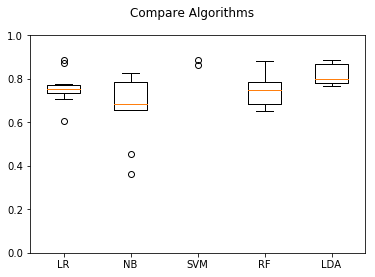

In [40]:
run_models(X1, title= 'Compare Algorithms')

In [ ]:
#The best algorithm for the topic model matrix is LDA at .82

In [ ]:
#Import Yelp Hotel Reviews for analysis

In [41]:
import json

businesses_filepath = 'yelp_training_set_business.json'

hotel_ids = set()

# open the businesses file
#f = open(fname, encoding="utf-8")
with open(businesses_filepath, encoding='utf_8') as f:
    
    # iterate through each line (json record) in the file
    for business_json in f:
        
        # convert the json record to a Python dict
        business = json.loads(business_json)
        
        # if this business is not a hotel, skip to the next one
        if u'Hotels' not in business[u'categories']:
            continue
            
        # add the hotel business id to our hotel_ids set
        hotel_ids.add(business[u'business_id'])


hotel_ids = frozenset(hotel_ids)

# print the number of unique hotel ids in the dataset
print ('{:,}'.format(len(hotel_ids)), u'hotels in the dataset.')

284 hotels in the dataset.


In [45]:
review_txt_filepath = 'review_text_all.txt'

In [46]:
review_json_filepath = 'yelp_training_set_review.json'
# 
if 0 == 0:
    
    review_count = 0

    # create & open a new file in write mode
    with open(review_txt_filepath, 'w', encoding='utf_8') as review_txt_file:

        # open the existing review json file
        with open(review_json_filepath, encoding='utf_8') as review_json_file:

            # loop through all reviews in the existing file and convert to dict
            for review_json in review_json_file:
                review = json.loads(review_json)

                # if this review is not about a hotel, skip to the next one
                if review[u'business_id'] not in hotel_ids:
                    continue

                # write the hotel review as a line in the new file
                # escape newline characters in the original review text
                review_txt_file.write(review[u'text'].replace('\n', '\\n') + '\n')
                review_count += 1

    print (u'''Text from {:,} hotel reviews written to the new txt file.'''.format(review_count))
    
else:
    
    with open(review_txt_filepath, encoding='utf_8') as review_txt_file:
        for review_count, line in enumerate(review_txt_file):
            pass
        
    print (u'Text from {:,} hotel reviews in the txt file.'.format(review_count + 1))

Text from 5,034 hotel reviews written to the new txt file.


In [37]:
# load json as string
#json.load((open('yelp_training_set_business.json')))

In [47]:
from pandas import read_csv

In [48]:
yelprevdf=pd.read_csv('yelpreviews.tsv',sep='\t')
#reviewsdf = pd.read_csv('deceptive-opinion.csv')
yelprevdf

,_ - text,_ - stars,_ - business_id,name
0,My wife took me here on my birthday for breakf...,5,9yKzy9PApeiPPOUJEtnvkg,NaN
1,I have no idea why some people give bad review...,5,ZRJwVLyzEJq1VAihDhYiow,NaN
2,love the gyro plate. Rice is so good and I als...,4,6oRAC4uyJCsJl1X0WZpVSA,NaN
3,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",5,_1QQZuf4zZOyFCvXc0o6Vg,NaN
4,General Manager Scott Petello is a good egg!!!...,5,6ozycU1RpktNG2-1BroVtw,NaN
5,"Quiessence is, simply put, beautiful. Full wi...",4,-yxfBYGB6SEqszmxJxd97A,NaN
6,Drop what you're doing and drive here. After I...,5,zp713qNhx8d9KCJJnrw1xA,NaN
7,"Luckily, I didn't have to travel far to make m...",4,hW0Ne_HTHEAgGF1rAdmR-g,NaN
8,Definitely come for Happy hour! Prices are ama...,4,wNUea3IXZWD63bbOQaOH-g,NaN
9,Nobuo shows his unique talents with everything...,5,nMHhuYan8e3cONo3PornJA,NaN


In [49]:
yelprevdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229907 entries, 0 to 229906
Data columns (total 4 columns):
_ - text           229901 non-null object
_ - stars          229907 non-null int64
_ - business_id    229907 non-null object
name               0 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 7.0+ MB


In [50]:
del yelprevdf['name']

In [53]:
yelprevdf=yelprevdf.dropna(how='any')

In [54]:
yelprevdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229901 entries, 0 to 229906
Data columns (total 3 columns):
_ - text           229901 non-null object
_ - stars          229901 non-null int64
_ - business_id    229901 non-null object
dtypes: int64(1), object(2)
memory usage: 7.0+ MB


In [55]:
#df = df.rename(columns={'oldName1': 'newName1', '_ - stars': 'stars', '_ - business_id': 'business_id'})
yelprevdf=yelprevdf.rename(columns = {'_ - text':'text', '_ - stars': 'stars', '_ - business_id': 'business_id'})
yelprevdf

,text,stars,business_id
0,My wife took me here on my birthday for breakf...,5,9yKzy9PApeiPPOUJEtnvkg
1,I have no idea why some people give bad review...,5,ZRJwVLyzEJq1VAihDhYiow
2,love the gyro plate. Rice is so good and I als...,4,6oRAC4uyJCsJl1X0WZpVSA
3,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",5,_1QQZuf4zZOyFCvXc0o6Vg
4,General Manager Scott Petello is a good egg!!!...,5,6ozycU1RpktNG2-1BroVtw
5,"Quiessence is, simply put, beautiful. Full wi...",4,-yxfBYGB6SEqszmxJxd97A
6,Drop what you're doing and drive here. After I...,5,zp713qNhx8d9KCJJnrw1xA
7,"Luckily, I didn't have to travel far to make m...",4,hW0Ne_HTHEAgGF1rAdmR-g
8,Definitely come for Happy hour! Prices are ama...,4,wNUea3IXZWD63bbOQaOH-g
9,Nobuo shows his unique talents with everything...,5,nMHhuYan8e3cONo3PornJA


In [56]:
yelbusdf=pd.read_csv('yelpbusiness.tsv',sep='\t')
yelbusdf

,_ - city,_ - name,_ - state,_ - business_id,_ - categories - categories
0,Chandler,Windmill Inns & Suites,AZ,9iLiMm3Z9nepRDu1AhgEoQ,Hotels & Travel
1,Phoenix,"The Ritz-Carlton, Phoenix",AZ,HLQUH1VAw4KbSV-IhxOPEw,Hotels & Travel
2,Scottsdale,Hampton Inn,AZ,9kue6njdYLYAr-ve65L0NA,Hotels & Travel
3,Scottsdale,Fairmont Scottsdale Princess,AZ,9mfec4ySQpW8doGs3FUP2Q,Hotels & Travel
4,Chandler,Crowne Plaza Resort Hotel San Marcos Golf Resort,AZ,F_sbmpkcdHh5IXwaNLtCMw,Hotels & Travel
5,Scottsdale,Motel 6,AZ,q7w9tokdouwt0vEEzsRqxg,Hotels & Travel
6,Chandler,Hilton Phoenix Chandler,AZ,1WUxcJDtvGgGUqsFMqJ5vg,Hotels & Travel
7,Scottsdale,Unicorn Balloon,AZ,ayjTrIEEbeFPnAqcjT98qg,Hotels & Travel
8,Mesa,La Quinta,AZ,RBaJjHV1aVb678kBMLQCZQ,Hotels & Travel
9,Tempe,Hyatt Place Tempe/Phoenix Airport,AZ,OECFqFDCDuqF8qWngIEJeA,Hotels & Travel


In [57]:
#check for null entries
yelbusdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328 entries, 0 to 327
Data columns (total 5 columns):
_ - city                       328 non-null object
_ - name                       328 non-null object
_ - state                      328 non-null object
_ - business_id                328 non-null object
_ - categories - categories    328 non-null object
dtypes: object(5)
memory usage: 12.9+ KB


In [58]:
#rename columns
yelbusdf=yelbusdf.rename(columns = {'_ - city':'city', '_ - name': 'name', '_ - state':'state', '_ - business_id': 'business_id', '_ - categories - categories': 'categories'})
yelbusdf

,city,name,state,business_id,categories
0,Chandler,Windmill Inns & Suites,AZ,9iLiMm3Z9nepRDu1AhgEoQ,Hotels & Travel
1,Phoenix,"The Ritz-Carlton, Phoenix",AZ,HLQUH1VAw4KbSV-IhxOPEw,Hotels & Travel
2,Scottsdale,Hampton Inn,AZ,9kue6njdYLYAr-ve65L0NA,Hotels & Travel
3,Scottsdale,Fairmont Scottsdale Princess,AZ,9mfec4ySQpW8doGs3FUP2Q,Hotels & Travel
4,Chandler,Crowne Plaza Resort Hotel San Marcos Golf Resort,AZ,F_sbmpkcdHh5IXwaNLtCMw,Hotels & Travel
5,Scottsdale,Motel 6,AZ,q7w9tokdouwt0vEEzsRqxg,Hotels & Travel
6,Chandler,Hilton Phoenix Chandler,AZ,1WUxcJDtvGgGUqsFMqJ5vg,Hotels & Travel
7,Scottsdale,Unicorn Balloon,AZ,ayjTrIEEbeFPnAqcjT98qg,Hotels & Travel
8,Mesa,La Quinta,AZ,RBaJjHV1aVb678kBMLQCZQ,Hotels & Travel
9,Tempe,Hyatt Place Tempe/Phoenix Airport,AZ,OECFqFDCDuqF8qWngIEJeA,Hotels & Travel


In [9]:
yelbusdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1077 entries, 0 to 1076
Data columns (total 5 columns):
_ - city                       368 non-null object
_ - name                       368 non-null object
_ - state                      368 non-null object
_ - business_id                368 non-null object
_ - categories - categories    1077 non-null object
dtypes: object(5)
memory usage: 42.1+ KB


In [13]:
#df.dropna(axis=0, how='all')
yelbusdf.dropna(axis=0, how='any')
yelbusdf

,_ - city,_ - name,_ - state,_ - business_id,_ - categories - categories
0,Chandler,Windmill Inns & Suites,AZ,9iLiMm3Z9nepRDu1AhgEoQ,Hotels & Travel
1,Phoenix,"The Ritz-Carlton, Phoenix",AZ,HLQUH1VAw4KbSV-IhxOPEw,Hotels & Travel
2,Scottsdale,Hampton Inn,AZ,9kue6njdYLYAr-ve65L0NA,Hotels & Travel
3,Scottsdale,Fairmont Scottsdale Princess,AZ,9mfec4ySQpW8doGs3FUP2Q,Hotels & Travel
4,Chandler,Crowne Plaza Resort Hotel San Marcos Golf Resort,AZ,F_sbmpkcdHh5IXwaNLtCMw,Hotels & Travel
5,Scottsdale,Motel 6,AZ,q7w9tokdouwt0vEEzsRqxg,Hotels & Travel
6,Chandler,Hilton Phoenix Chandler,AZ,1WUxcJDtvGgGUqsFMqJ5vg,Hotels & Travel
7,Scottsdale,Unicorn Balloon,AZ,ayjTrIEEbeFPnAqcjT98qg,Hotels & Travel
8,Mesa,La Quinta,AZ,RBaJjHV1aVb678kBMLQCZQ,Hotels & Travel
9,Tempe,Hyatt Place Tempe/Phoenix Airport,AZ,OECFqFDCDuqF8qWngIEJeA,Hotels & Travel


In [14]:
yelbusdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1077 entries, 0 to 1076
Data columns (total 5 columns):
_ - city                       368 non-null object
_ - name                       368 non-null object
_ - state                      368 non-null object
_ - business_id                368 non-null object
_ - categories - categories    1077 non-null object
dtypes: object(5)
memory usage: 42.1+ KB


In [19]:
#"Inner join produces only the set of records that match in both Table A and Table B."
#pd.merge(df_a, df_b, on='subject_id', how='inner')
pd.merge(yelprevdf, yelbusdf, on='_ - business_id',how='inner')

,_ - city_x,_ - name_x,_ - state_x,_ - business_id,_ - categories - categories_x,_ - city_y,_ - name_y,_ - state_y,_ - categories - categories_y
0,Chandler,Windmill Inns & Suites,AZ,9iLiMm3Z9nepRDu1AhgEoQ,Hotels & Travel,Chandler,Windmill Inns & Suites,AZ,Hotels & Travel
1,Phoenix,"The Ritz-Carlton, Phoenix",AZ,HLQUH1VAw4KbSV-IhxOPEw,Hotels & Travel,Phoenix,"The Ritz-Carlton, Phoenix",AZ,Hotels & Travel
2,Scottsdale,Hampton Inn,AZ,9kue6njdYLYAr-ve65L0NA,Hotels & Travel,Scottsdale,Hampton Inn,AZ,Hotels & Travel
3,Scottsdale,Fairmont Scottsdale Princess,AZ,9mfec4ySQpW8doGs3FUP2Q,Hotels & Travel,Scottsdale,Fairmont Scottsdale Princess,AZ,Hotels & Travel
4,Chandler,Crowne Plaza Resort Hotel San Marcos Golf Resort,AZ,F_sbmpkcdHh5IXwaNLtCMw,Hotels & Travel,Chandler,Crowne Plaza Resort Hotel San Marcos Golf Resort,AZ,Hotels & Travel
5,Scottsdale,Motel 6,AZ,q7w9tokdouwt0vEEzsRqxg,Hotels & Travel,Scottsdale,Motel 6,AZ,Hotels & Travel
6,Chandler,Hilton Phoenix Chandler,AZ,1WUxcJDtvGgGUqsFMqJ5vg,Hotels & Travel,Chandler,Hilton Phoenix Chandler,AZ,Hotels & Travel
7,Scottsdale,Unicorn Balloon,AZ,ayjTrIEEbeFPnAqcjT98qg,Hotels & Travel,Scottsdale,Unicorn Balloon,AZ,Hotels & Travel
8,Mesa,La Quinta,AZ,RBaJjHV1aVb678kBMLQCZQ,Hotels & Travel,Mesa,La Quinta,AZ,Hotels & Travel
9,Tempe,Hyatt Place Tempe/Phoenix Airport,AZ,OECFqFDCDuqF8qWngIEJeA,Hotels & Travel,Tempe,Hyatt Place Tempe/Phoenix Airport,AZ,Hotels & Travel


In [59]:
yelbusdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328 entries, 0 to 327
Data columns (total 5 columns):
city           328 non-null object
name           328 non-null object
state          328 non-null object
business_id    328 non-null object
categories     328 non-null object
dtypes: object(5)
memory usage: 12.9+ KB


In [60]:
#join datafromes on business_id

In [61]:
#

In [62]:
#

In [63]:
#df['column'] = df['column'].astype('|S80')
#df.rename(columns={'oldName1': 'newName1', 'oldName2': 'newName2'}, inplace=True)
#pd.merge(yelprevdf, yelbusdf, on='_-business_id',how='inner')
yelprevdf['business_id'] = yelprevdf['business_id'].astype('|S22')

In [64]:
#did not convert business id to string (22 characters) Why not?
yelprevdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229901 entries, 0 to 229906
Data columns (total 3 columns):
text           229901 non-null object
stars          229901 non-null int64
business_id    229901 non-null object
dtypes: int64(1), object(2)
memory usage: 7.0+ MB


In [ ]:
#"Inner join produces only the set of records that match in both Table A and Table B."
#pd.merge(df_a, df_b, on='subject_id', how='inner')
#?
#SELECT name, stars, text
#From yelprevdf, yelbusdf
#WHERE yelprevdf.business_id = yelpbusdf.business_id
pd.merge(yelprevdf, yelbusdf, on='business_id',how='inner')